# 日経平均株価 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-13 00:00:00+09:00,36882.410156,36887.398438,36441.339844,36581.761719,115900000,0.0,0.0
2024-09-17 00:00:00+09:00,36601.929688,36663.179688,35828.539062,36203.218750,127300000,0.0,0.0
2024-09-18 00:00:00+09:00,36546.039062,36675.070312,36127.449219,36380.171875,99900000,0.0,0.0
2024-09-19 00:00:00+09:00,36958.929688,37394.519531,36958.929688,37155.328125,114100000,0.0,0.0
2024-09-20 00:00:00+09:00,37714.070312,37974.718750,37654.109375,37723.910156,162600000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-07 00:00:00+09:00,37198.300781,37221.648438,36813.621094,36887.171875,136800000,0.0,0.0
2025-03-10 00:00:00+09:00,36972.589844,37113.480469,36705.019531,37028.269531,109800000,0.0,0.0
2025-03-11 00:00:00+09:00,36584.371094,36793.109375,35987.128906,36793.109375,153600000,0.0,0.0


In [2]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-13 00:00:00+09:00,27886.210938,27906.970703,27631.529297,27832.960938,96100000,0.0,0.0
2023-03-14 00:00:00+09:00,27455.949219,27455.949219,27104.750000,27222.039062,125700000,0.0,0.0
2023-03-15 00:00:00+09:00,27421.660156,27424.939453,27105.990234,27229.480469,86600000,0.0,0.0
2023-03-16 00:00:00+09:00,26796.669922,27057.539062,26632.919922,27010.609375,107100000,0.0,0.0
2023-03-17 00:00:00+09:00,27232.230469,27356.150391,27071.710938,27333.789062,101500000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-07 00:00:00+09:00,37198.300781,37221.648438,36813.621094,36887.171875,136800000,0.0,0.0
2025-03-10 00:00:00+09:00,36972.589844,37113.480469,36705.019531,37028.269531,109800000,0.0,0.0
2025-03-11 00:00:00+09:00,36584.371094,36793.109375,35987.128906,36793.109375,153600000,0.0,0.0


## 日足チャートと Bollinger's bands

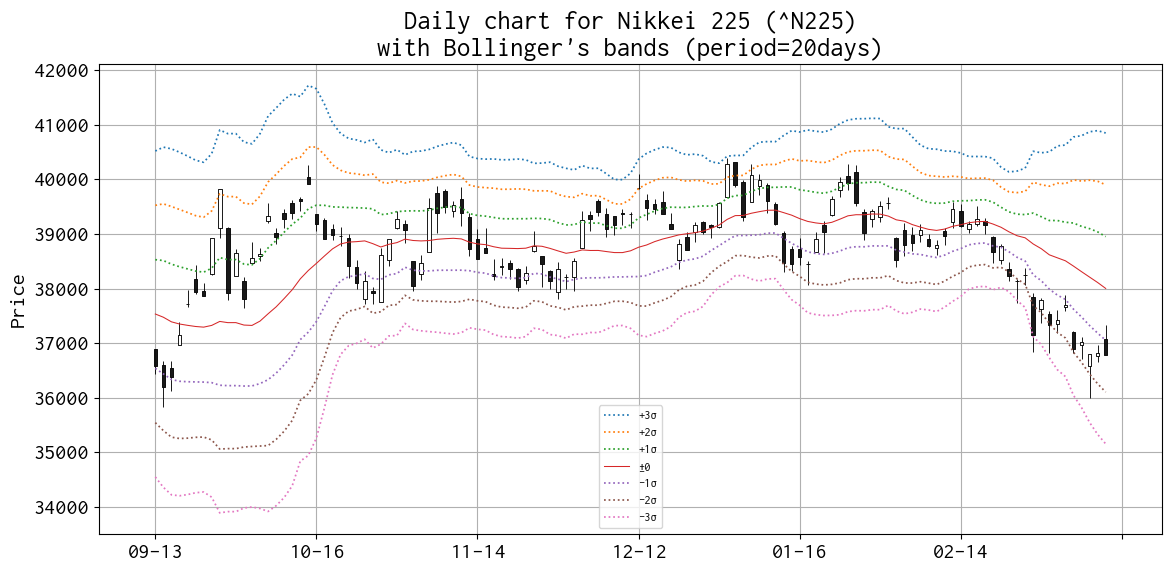

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [4]:
len(df)

244

In [5]:
df.tail(2)['Close']

Date
2025-03-07 00:00:00+09:00    36887.171875
2025-03-11 00:00:00+09:00    36209.589844
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-07 00:00:00+09:00           NaN
2025-03-11 00:00:00+09:00   -677.582031
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail()

Date
2025-03-04 00:00:00+09:00    38777.435625
2025-03-05 00:00:00+09:00    38691.533125
2025-03-06 00:00:00+09:00    38639.055469
2025-03-07 00:00:00+09:00    38537.951094
2025-03-11 00:00:00+09:00    38405.775938
Name: Close, dtype: float64

In [40]:
df['Close'].rolling(75).mean().tail()

Date
2025-02-21 00:00:00+09:00    39057.803958
2025-02-25 00:00:00+09:00    39046.557813
2025-02-26 00:00:00+09:00    39047.740469
2025-02-27 00:00:00+09:00    39044.824115
2025-02-28 00:00:00+09:00    39013.821823
Name: Close, dtype: float64

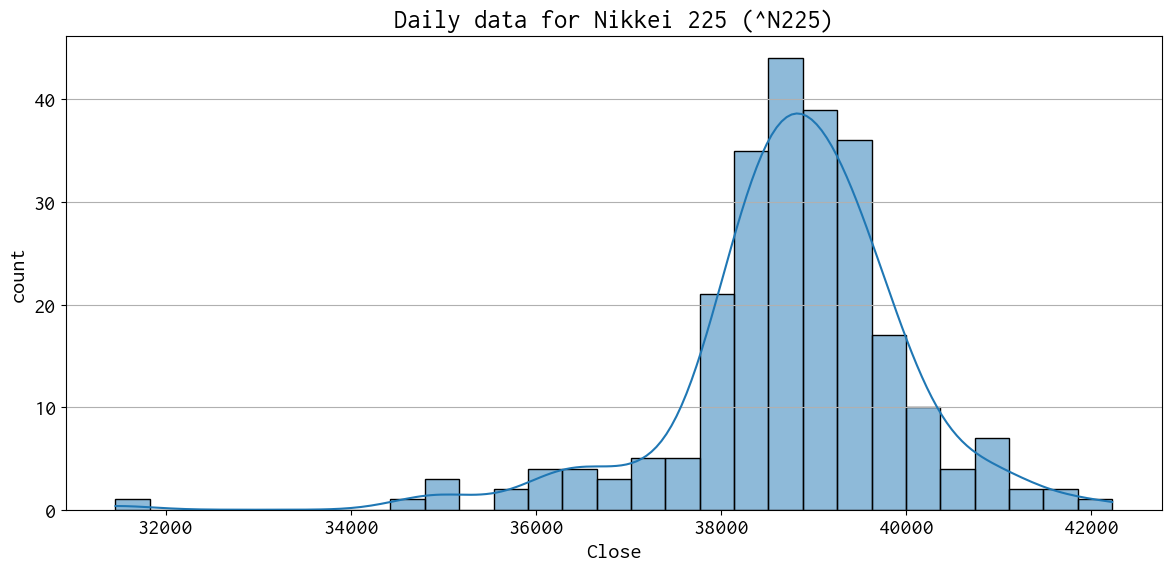

In [41]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

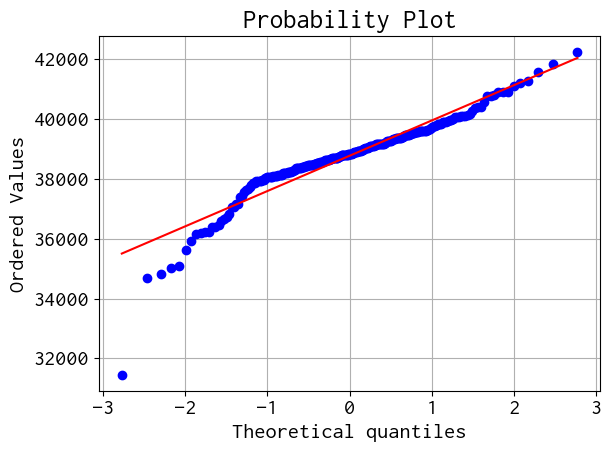

In [42]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

In [43]:
len(df)

246

In [44]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.909, p-value: 0.000


In [47]:
res = stats.anderson(df['Close'])

In [48]:
print('%.3f' % res.statistic)

5.237


In [49]:
print(res.critical_values)

[0.567 0.646 0.775 0.904 1.075]


In [50]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
